In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv("./start-up-list.csv")

In [9]:
df

,Organization Name,Organization Name URL,Estimated Revenue Range,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Number of Employees,...,Total Equity Funding Amount,Total Equity Funding Amount Currency,Total Equity Funding Amount (in USD),Top 5 Investors,Number of Investors,Number of Lead Investors,Website,Founders,Number of Founders,Region
0,Igloo,https://www.crunchbase.com/organization/axinan,$10M to $50M,"Artificial Intelligence (AI), Financial Servic...","Singapore, Central Region, Singapore",Igloo is an insurtech firm that creates insura...,3524,1-Jun-16,month,101-250,...,9.800000e+07,USD,98000000.0,"Cathay Innovation, Finnfund, Partech, Eurazeo,...",13.0,4.0,https://www.iglooinsure.com,"Raunak Mehta, Wei Zhu",2.0,ASIAN
1,Sky Mavis,https://www.crunchbase.com/organization/sky-mavis,$1B to $10B,"Blockchain, Information Technology, Video Games","Singapore, Central Region, Singapore",Sky Mavis is a technology company that creates...,6699,24-Apr-19,day,101-250,...,3.110000e+08,USD,311000000.0,"Andreessen Horowitz, Accel, Paradigm, 500 Glob...",36.0,4.0,https://www.Skymavis.com,"Aleksander Leonard Larsen, Jeffrey Zirlin",2.0,ASIAN
2,Super,https://www.crunchbase.com/organization/super-...,$1M to $10M,"Apps, Consumer, E-Commerce","Surabaya, Jawa Timur, Indonesia",Super is a social commerce platform that enabl...,95241,5-Apr-18,day,101-250,...,1.050000e+08,USD,105000000.0,"B Capital, Y Combinator, New Enterprise Associ...",15.0,3.0,https://superapp.id,"Debeasinta Budiman, Steven Wongsoredjo",2.0,ASIAN
3,PrivyID,https://www.crunchbase.com/organization/privyid,$50M to $100M,"Identity Management, Information Technology","Jakarta, Jakarta Raya, Indonesia",PrivyID is building an unprecedented business ...,101474,1-Jan-15,year,101-250,...,7.161000e+07,USD,71610000.0,"Endeavor Catalyst, Bossa Invest, MDI Ventures,...",13.0,6.0,https://privy.id/,"Guritno Adi Saputra, Marshall Pribadi",2.0,ASIAN
4,ElevenLabs,https://www.crunchbase.com/organization/eleven...,$10M to $50M,"Artificial Intelligence (AI), Content Creators...","New York, New York, United States",ElevenLabs develops AI audio models for speech...,27,17-Apr-22,day,101-250,...,2.810000e+08,USD,281000000.0,"Andreessen Horowitz, Sequoia Capital, Valor Eq...",39.0,6.0,http://elevenlabs.io,"Mati Staniszewski, Piotr Dabkowski",2.0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,Sparky Animation,https://www.crunchbase.com/organization/sparky...,$1M to $10M,"Animation, Art, Digital Entertainment","Singapore, Central Region, Singapore",Sparky Animation is an animation production an...,401116,1-Jan-04,year,51-100,...,1.300000e+07,SGD,10321592.0,iGlobe Partners,1.0,1.0,http://sparkyanim.com/,Kok Wong,1.0,ASIAN
1112,Moloco,https://www.crunchbase.com/organization/moloco,$100M to $500M,"Advertising, Cloud Infrastructure, Mobile, Mob...","Redwood City, California, United States",Moloco offers programmatic advertising solutio...,1385,1-Jan-13,year,501-1000,...,2.157490e+08,USD,215748979.0,"Tiger Global Management, EDBI, Fidelity, Premi...",12.0,7.0,http://www.moloco.com/,"David Sehyuk Park, Ikkjin Ahn",2.0,US
1113,Plus One Robotics,https://www.crunchbase.com/organization/plus-o...,$1M to $10M,"Industrial Automation, Logistics, Robotics, So...","San Antonio, Texas, United States",Plus One Robotics develops a parcel-handling r...,2477,1-Jan-16,year,51-100,...,9.708273e+07,USD,97082728.0,"Dynamo, Translink Capital, Scale Venture Partn...",19.0,5.0,https://plusonerobotics.com,"Erik Nieves, Paul Hvass, Shaun Edwards",3.0,US
1114,VisionNav Robotics,https://www.crunchbase.com/organization/vision...,$100M to $500M,"Industrial Automation, Robotics","Acworth, Georgia, United States",Global Leading supplier of autonomous industri...,5927,1-Feb-16,day,251-500,...,9.200000e+08,CNY,139186293.0,"Meituan, ByteDance, Lenovo Capital and Incubat...",12.0,4.0,https://www.visionnav.com/,"Liu Yunhui, Luyang Li, Mu Fang, Y

In [10]:
columns_to_drop = [
    'Organization Name URL', 'Website', 'Description', 'Founders',
    'Number of Founders', 'Founded Date Precision','Last Funding Amount',
    'Last Funding Amount Currency', 'Total Funding Amount', 'Total Funding Amount Currency',
    'Last Equity Funding Amount', 'Last Equity Funding Amount Currency','Total Equity Funding Amount',
    'Total Equity Funding Amount Currency',
]
df = df.drop(columns=columns_to_drop)

print(df.columns)
print(df.shape)

Index(['Organization Name', 'Estimated Revenue Range', 'Industries',
       'Headquarters Location', 'CB Rank (Company)', 'Founded Date',
       'Number of Employees', 'Last Funding Type', 'IPO Status',
       'Funding Status', 'Last Funding Date', 'Last Funding Amount (in USD)',
       'Total Funding Amount (in USD)', 'Last Equity Funding Type',
       'Number of Funding Rounds', 'Last Equity Funding Amount (in USD)',
       'Total Equity Funding Amount (in USD)', 'Top 5 Investors',
       'Number of Investors', 'Number of Lead Investors', 'Region'],
      dtype='object')
(1116, 21)


In [11]:
import re

def clean_employee_range(value):
    """
    Cleans and converts a variety of employee range formats into a single numerical midpoint.
    Specifically handles date-like misinterpretations (e.g., '1-Oct' -> '1-10').
    """
    if pd.isna(value):
        return np.nan

    s = str(value).lower().strip()

    month_map = {
        'jan': '1', 'feb': '2', 'mar': '3', 'apr': '4', 'may': '5', 'jun': '6',
        'jul': '7', 'aug': '8', 'sep': '9', 'oct': '10', 'nov': '11', 'dec': '12'
    }

    for month_str, month_num in month_map.items():
        if month_str in s:
            s = s.replace(month_str, month_num)

    numbers = re.findall(r'\d+', s)

    if not numbers:
        return np.nan

    numeric_values = [float(n) for n in numbers]

    if len(numeric_values) == 1:
        return int(numeric_values[0])
    elif len(numeric_values) == 2:
        midpoint = np.mean(numeric_values)
        return int(midpoint)
    else:
        return np.nan

In [12]:
df['Number of Employees Midpoint'] = df['Number of Employees'].apply(clean_employee_range)
df['Number of Employees Midpoint'].unique()

array([  175,    75,  3000,   750,   375,    30,  7500,     5, 10001])

In [13]:
cols_to_check = ['Last Funding Amount (in USD)',
                 'Total Funding Amount (in USD)',
                 'Last Equity Funding Amount (in USD)',
                 'Total Equity Funding Amount (in USD)'
                ]
#remove miss value
df.dropna(subset=cols_to_check, how='all', inplace=True)

df.shape

(1107, 22)

In [14]:
# Location standardization
df[['City', 'Country']] = df['Headquarters Location'].str.extract(r'^([^,]+),.*,\s*([^,]+)$')

df["Country"]

,Country
0,Singapore
1,Singapore
2,Indonesia
3,Indonesia
4,United States
...,...
1111,Singapore
1112,United States
1113,United States
1114,United States


In [15]:
# Tranform Founded Data o Founded Year
df['Founded Date'] = pd.to_datetime(df['Founded Date'], errors='coerce')
df['Founded Year'] = df['Founded Date'].dt.year

df['Founded Year']

/tmp/ipython-input-15-1737774419.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Founded Date'] = pd.to_datetime(df['Founded Date'], errors='coerce')


,Founded Year
0,2016.0
1,2019.0
2,2018.0
3,2015.0
4,2022.0
...,...
1111,2004.0
1112,2013.0
1113,2016.0
1114,2016.0


In [16]:
def convert_revenue_range(value):
    """
    Converts revenue range strings to numerical midpoints (in USD).
    """
    if pd.isna(value):
        return np.nan

    s = str(value).strip()

    if s == 'Less than $1M':
        return 0.5e6  # Assuming midpoint of 0 to 1M is 0.5M
    elif s == '$1M to $10M':
        return 5.5e6  # Midpoint of 1M to 10M
    elif s == '$10M to $50M':
        return 30e6   # Midpoint of 10M to 50M
    elif s == '$50M to $100M':
        return 75e6  # Midpoint of 50M to 100M
    elif s == '$100M to $500M':
        return 300e6  # Midpoint of 100M to 500M
    elif s == '$500M to $1B':
        return 750e6  # Midpoint of 500M to 1B
    elif s == '$1B to $10B':
        return 5.5e9  # Midpoint of 1B to 10B
    else:
        return np.nan

In [17]:
df['Estimated Revenue Range Midpoint'] = df['Estimated Revenue Range'].apply(convert_revenue_range)
df['log_Revenue_Midpoint'] = np.log1p(df['Estimated Revenue Range Midpoint'])

df[['Estimated Revenue Range', 'Estimated Revenue Range Midpoint', 'log_Revenue_Midpoint']].head(20)

,Estimated Revenue Range,Estimated Revenue Range Midpoint,log_Revenue_Midpoint
0,$10M to $50M,3.000000e+07,17.216708
1,$1B to $10B,5.500000e+09,22.428014
2,$1M to $10M,5.500000e+06,15.520259
3,$50M to $100M,7.500000e+07,18.132999
4,$10M to $50M,3.000000e+07,17.216708
5,$10M to $50M,3.000000e+07,17.216708
6,$1M to $10M,5.500000e+06,15.520259
7,$1M to $10M,5.500000e+06,15.520259
8,NaN,NaN,NaN
9,$100M to $500M,3.000000e+08,19.519293


In [18]:
# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values,
                          'Percentage': missing_percent})
missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)


Missing values per column:


,Missing Values,Percentage
Last Funding Amount (in USD),96,8.672087
log_Revenue_Midpoint,69,6.233062
Estimated Revenue Range,69,6.233062
Estimated Revenue Range Midpoint,69,6.233062
Last Equity Funding Amount (in USD),62,5.600723
Number of Lead Investors,10,0.903342
Top 5 Investors,3,0.271003
Number of Investors,3,0.271003
Industries,1,0.090334
Founded Date,1,0.090334


In [19]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [20]:
def clean_industry_text(text):
    """Standardizes industry text for better embedding."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\s*\([^)]*\)', '', text)

    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()


all_industries = set()
for industries_str in df['Industries'].dropna():
    industries_list = [clean_industry_text(i.strip()) for i in industries_str.split(',')]
    all_industries.update(industries_list)


all_industries.discard('')
unique_industries = sorted(list(all_industries))

print(f"\nFound {len(unique_industries)} unique, cleaned industries.")


Found 489 unique, cleaned industries.


In [21]:
model = SentenceTransformer('all-MiniLM-L6-v2')

print("Encoding unique industries into vectors...")
industry_embeddings = model.encode(unique_industries, show_progress_bar=True)

# Create a mapping from industry name to its vector
industry_to_vector = dict(zip(unique_industries, industry_embeddings))

print(f"Created {industry_embeddings.shape[0]} vectors of dimension {industry_embeddings.shape[1]}.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding unique industries into vectors...


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Created 489 vectors of dimension 384.


In [23]:
print("\nCalculating optimal k for K-Means using the Elbow Method...")
inertias = []
k_range = list(range(5, 60))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(industry_embeddings)
    inertias.append(kmeans.inertia_)



Calculating optimal k for K-Means using the Elbow Method...


In [24]:
points = np.array(list(zip(k_range, inertias)))

p1 = points[0]
p2 = points[-1]

distances = []
for i in range(len(points)):
    p = points[i]

    distance = np.linalg.norm(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)
    distances.append(distance)

optimal_k_index = np.argmax(distances)
optimal_k = k_range[optimal_k_index]

print(f"\nOptimal K: {optimal_k}")


Optimal K: 25


/tmp/ipython-input-24-1149836947.py:10: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance = np.linalg.norm(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)


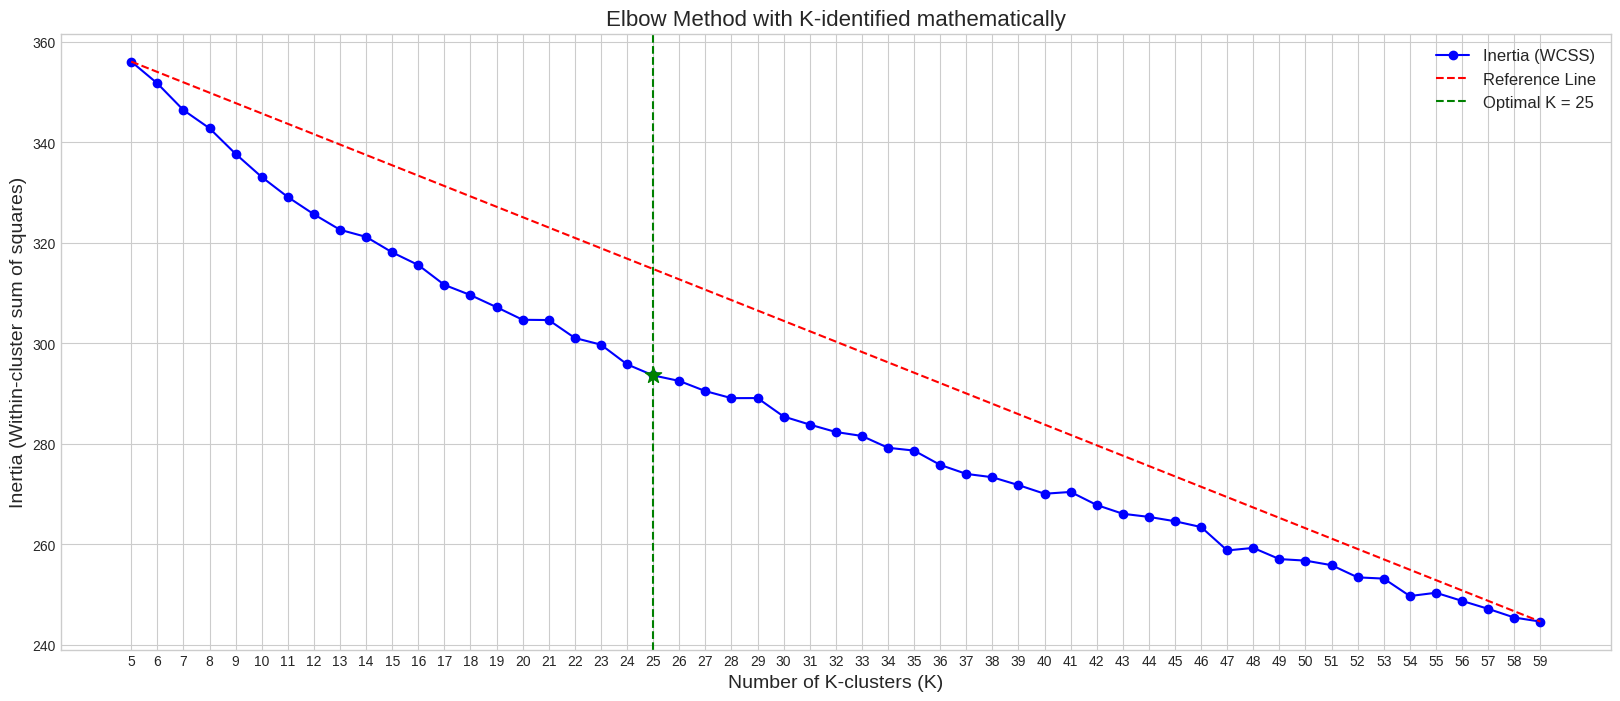

In [25]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 8))

plt.plot(k_range, inertias, 'bo-', label='Inertia (WCSS)')

plt.plot([k_range[0], k_range[-1]], [inertias[0], inertias[-1]], 'r--', label='Reference Line')

plt.axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.scatter(optimal_k, inertias[optimal_k_index], c='g', s=150, marker='*', zorder=10) # Đánh dấu điểm khuỷu

plt.xlabel('Number of K-clusters (K)', fontsize=14)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=14)
plt.title('Elbow Method with K-identified mathematically', fontsize=16)
plt.xticks(k_range)
plt.legend(fontsize=12)# Based on the plot, you choose a value for k.
OPTIMAL_K = optimal_k

kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
kmeans.fit(industry_embeddings)

industry_to_cluster_map = dict(zip(unique_industries, kmeans.labels_))
plt.show()

In [26]:
# Based on the plot, you choose a value for k.
OPTIMAL_K = optimal_k

kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
kmeans.fit(industry_embeddings)

industry_to_cluster_map = dict(zip(unique_industries, kmeans.labels_))

In [27]:
print("\n--- Inspecting Sample Clusters ---")
for i in range(OPTIMAL_K):
    cluster_industries = [industry for industry, cluster_id in industry_to_cluster_map.items() if cluster_id == i]

    print(f"Cluster {i}: {', '.join(cluster_industries[:10])}...")


--- Inspecting Sample Clusters ---
Cluster 0: environmental consulting, hotel, leasing, rental, rental property, vacation rental...
Cluster 1: business development, business information systems, business process automation, ecommerce, ecommerce platforms, enterprise, enterprise applications, enterprise resource planning, enterprise software, marketing automation...
Cluster 2: addiction treatment, alternative medicine, alternative protein, bioinformatics, biopharma, biotechnology, cannabis, chemical, clinical trials, diabetes...
Cluster 3: consulting, courier service, customer service, delivery service, freelance, freight service, information services, infrastructure, it infrastructure, location based services...
Cluster 4: application performance management, asset management, cloud management, cms, contact management, crm, document management, drone management, event management, facility management...
Cluster 5: animation, artificial intelligence, augmented reality, autonomous vehicle

In [28]:
# Find the Most Representative Name for Each Cluster

from sklearn.metrics.pairwise import cosine_similarity

cluster_centroids = kmeans.cluster_centers_
num_clusters = kmeans.n_clusters

cluster_id_to_name_map = {}

for i in range(num_clusters):
    industries_in_cluster = [name for name, cluster_id in industry_to_cluster_map.items() if cluster_id == i]

    if not industries_in_cluster:
        cluster_id_to_name_map[i] = f"Unnamed_Cluster_{i}"
        continue

    # Get the embedding vectors for these specific industries
    indices = [unique_industries.index(name) for name in industries_in_cluster]
    embeddings_in_cluster = industry_embeddings[indices]

    # Get the centroid vector for this cluster
    centroid = cluster_centroids[i].reshape(1, -1)

    # Calculate cosine similarity between the centroid and all industries in this cluster
    similarities = cosine_similarity(centroid, embeddings_in_cluster)

    # Find the industry with the highest similarity score
    most_representative_index = np.argmax(similarities)
    cluster_name = industries_in_cluster[most_representative_index]

    # Store the mapping with a nicely formatted name
    cluster_id_to_name_map[i] = cluster_name.title()

print("\n--- Discovered Representative Names for Each Industry Cluster ---")
for cluster_id, name in cluster_id_to_name_map.items():
    print(f"Cluster {cluster_id}: {name}")


--- Discovered Representative Names for Each Industry Cluster ---
Cluster 0: Rental
Cluster 1: Enterprise Software
Cluster 2: Biopharma
Cluster 3: Service Industry
Cluster 4: It Management
Cluster 5: Artificial Intelligence
Cluster 6: Ethereum
Cluster 7: Gaming
Cluster 8: Industrial Engineering
Cluster 9: Travel
Cluster 10: Education
Cluster 11: Marketing
Cluster 12: Security
Cluster 13: Audio
Cluster 14: Mobile
Cluster 15: Finance
Cluster 16: Data Management
Cluster 17: Software
Cluster 18: Residential
Cluster 19: Health Care
Cluster 20: Catering
Cluster 21: Energy
Cluster 22: Apparel
Cluster 23: Lending
Cluster 24: Internet


In [29]:
print("\nCreating final cluster features in the DataFrame...")

for i in range(OPTIMAL_K):
    df[f'Industry_Cluster_{i}'] = 0

# Populate the cluster columns
for index, row in df.iterrows():
    if pd.notna(row['Industries']):
        company_industries = [clean_industry_text(i.strip()) for i in row['Industries'].split(',')]

        # Get the set of unique clusters for this company
        company_clusters = set()
        for industry in company_industries:
            if industry in industry_to_cluster_map:
                cluster_id = industry_to_cluster_map[industry]
                company_clusters.add(cluster_id)

        # Set the corresponding cluster columns to 1
        for cluster_id in company_clusters:
            df.at[index, f'Industry_Cluster_{cluster_id}'] = 1

print("\n--- DataFrame with New Industry Cluster Features ---")

display_cols = ['Organization Name', 'Industries'] + [f'Industry_Cluster_{i}' for i in range(OPTIMAL_K)]

df[display_cols].head()


Creating final cluster features in the DataFrame...

--- DataFrame with New Industry Cluster Features ---


,Organization Name,Industries,Industry_Cluster_0,Industry_Cluster_1,Industry_Cluster_2,Industry_Cluster_3,Industry_Cluster_4,Industry_Cluster_5,Industry_Cluster_6,Industry_Cluster_7,...,Industry_Cluster_15,Industry_Cluster_16,Industry_Cluster_17,Industry_Cluster_18,Industry_Cluster_19,Industry_Cluster_20,Industry_Cluster_21,Industry_Cluster_22,Industry_Cluster_23,Industry_Cluster_24
0,Igloo,"Artificial Intelligence (AI), Financial Servic...",0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Sky Mavis,"Blockchain, Information Technology, Video Games",0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,Super,"Apps, Consumer, E-Commerce",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PrivyID,"Identity Management, Information Technology",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,ElevenLabs,"Artificial Intelligence (AI), Content Creators...",0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [30]:
df['Industries'] = df['Industries'].fillna('').astype(str)

def get_all_industry_groups(industry_list_str):
    """
    Finds all unique industry groups a company belongs to.
    Assumes the input will always be a string.
    """
    # Because of our pre-cleaning, we only need to check for an empty string.
    if not industry_list_str:
        return "Unknown"

    company_industries = [s.strip().lower() for s in industry_list_str.split(',')]

    unique_cluster_ids = set()
    for industry in company_industries:
        if industry in industry_to_cluster_map:
            unique_cluster_ids.add(industry_to_cluster_map[industry])

    if not unique_cluster_ids:
        return "Uncategorized"

    group_names = [cluster_id_to_name_map.get(cid, "Unknown Cluster") for cid in sorted(list(unique_cluster_ids))]

    return ", ".join(group_names)

df['industry_group'] = df['Industries'].apply(get_all_industry_groups)

display_cols = ['Organization Name', 'Industries', 'industry_group']
df[display_cols]

,Organization Name,Industries,industry_group
0,Igloo,"Artificial Intelligence (AI), Financial Servic...","Education, Finance, Health Care"
1,Sky Mavis,"Blockchain, Information Technology, Video Games","Ethereum, Gaming, Internet"
2,Super,"Apps, Consumer, E-Commerce","Marketing, Mobile"
3,PrivyID,"Identity Management, Information Technology","Finance, Internet"
4,ElevenLabs,"Artificial Intelligence (AI), Content Creators...","Artificial Intelligence, Software, Internet"
...,...,...,...
1111,Sparky Animation,"Animation, Art, Digital Entertainment","Artificial Intelligence, Education, Audio"
1112,Moloco,"Advertising, Cloud Infrastructure, Mobile, Mob...","Marketing, Mobile, Data Management"
1113,Plus One Robotics,"Industrial Automation, Logistics, Robotics, So...","Artificial Intelligence, Industrial Engineerin..."
1114,VisionNav Robotics,"Industrial Automation, Robotics","Artificial Intelligence, Industrial Engineering"


In [31]:
# Create new log-transformed columns
new_df = pd.DataFrame()
new_df['log_Total_Funding'] = np.log1p(df['Total Funding Amount (in USD)'])
new_df['log_Total_Equity_Funding'] = np.log1p(df['Total Equity Funding Amount (in USD)'])
new_df

,log_Total_Funding,log_Total_Equity_Funding
0,18.400478,18.400478
1,19.555303,19.555303
2,18.469471,18.469471
3,18.086745,18.086745
4,19.453865,19.453865
...,...,...
1111,16.149749,16.149749
1112,19.189626,19.189626
1113,18.391074,18.391074
1114,18.751324,18.751324


In [32]:
# List all the final feature columns
cluster_cols = [f'Industry_Cluster_{i}' for i in range(OPTIMAL_K)]
log_feature_cols = ['log_Total_Funding', 'log_Total_Equity_Funding']

# Combine them into one list
final_feature_columns = log_feature_cols + cluster_cols

existing_final_cols = [col for col in final_feature_columns if col in df.columns]
X = df[existing_final_cols].copy()

In [33]:
# Log-transform the target variables. np.log1p handles zeros gracefully (log(1+x)).
df['log_LFA'] = np.log1p(df['Last Funding Amount (in USD)'])
df['log_LEFA'] = np.log1p(df['Last Equity Funding Amount (in USD)'])

# Create boolean masks to identify which rows need imputation
lfa_missing_mask = df['log_LFA'].isnull()
lefa_missing_mask = df['log_LEFA'].isnull()

print(f"Rows missing 'Last Funding Amount': {lfa_missing_mask.sum()}")
print(f"Rows missing 'Last Equity Funding Amount': {lefa_missing_mask.sum()}")

Rows missing 'Last Funding Amount': 96
Rows missing 'Last Equity Funding Amount': 62


# Task
Impute missing values in the 'log_LFA' and 'log_LEFA' columns of the DataFrame using XGBoost regression.

## Prepare data for imputation

Separate the dataset into two subsets: one for training the imputation models (rows with non-missing target values) and one for prediction (rows with missing target values). Select the features (`X`) and the target variables (`log_LFA` and `log_LEFA`).


Separate the data into training and prediction sets for both target variables based on the missing value masks.



In [35]:
X_train_lfa = X[~lfa_missing_mask].copy()
y_train_lfa = df.loc[~lfa_missing_mask, 'log_LFA'].copy()
X_predict_lfa = X[lfa_missing_mask].copy()

X_train_lefa = X[~lefa_missing_mask].copy()
y_train_lefa = df.loc[~lefa_missing_mask, 'log_LEFA'].copy()
X_predict_lefa = X[lefa_missing_mask].copy()

print(f"Shape of X_train_lfa: {X_train_lfa.shape}")
print(f"Shape of y_train_lfa: {y_train_lfa.shape}")
print(f"Shape of X_predict_lfa: {X_predict_lfa.shape}")

print(f"Shape of X_train_lefa: {X_train_lefa.shape}")
print(f"Shape of y_train_lefa: {y_train_lefa.shape}")
print(f"Shape of X_predict_lefa: {X_predict_lefa.shape}")

Shape of X_train_lfa: (1011, 25)
Shape of y_train_lfa: (1011,)
Shape of X_predict_lfa: (96, 25)
Shape of X_train_lefa: (1045, 25)
Shape of y_train_lefa: (1045,)
Shape of X_predict_lefa: (62, 25)


## Train xgboost models

Train two separate XGBoost Regressor models, one for predicting `log_LFA` and another for predicting `log_LEFA`, using the training data prepared in the previous step.


In [41]:
from xgboost import XGBRegressor

xgb_lfa = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100, learning_rate=0.001, max_depth=5)
xgb_lfa.fit(X_train_lfa, y_train_lfa,)

xgb_lefa = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100, learning_rate=0.001, max_depth=5)
xgb_lefa.fit(X_train_lefa, y_train_lefa)

print("XGBoost models trained for log_LFA and log_LEFA imputation.")

XGBoost models trained for log_LFA and log_LEFA imputation.


## Predict missing values

Use the trained XGBoost models to predict the missing values in the `log_LFA` and `log_LEFA` columns for the prediction subset.


In [43]:
predicted_lfa = xgb_lfa.predict(X_predict_lfa)
predicted_lefa = xgb_lefa.predict(X_predict_lefa)

print(f"Predicted {len(predicted_lfa)} missing log_LFA values.")
print(f"Predicted {len(predicted_lefa)} missing log_LEFA values.")

Predicted 96 missing log_LFA values.
Predicted 62 missing log_LEFA values.


In [44]:
df.loc[lfa_missing_mask, 'log_LFA'] = predicted_lfa
df.loc[lefa_missing_mask, 'log_LEFA'] = predicted_lefa

print("\nMissing values after imputation:")
print(df[['log_LFA', 'log_LEFA']].isnull().sum())


Missing values after imputation:
log_LFA     0
log_LEFA    0
dtype: int64


In [46]:
df[['log_LFA', 'log_LEFA']]

,log_LFA,log_LEFA
0,17.399030,17.399030
1,18.826146,18.826146
2,18.064006,18.064006
3,17.686712,17.686712
4,19.008467,19.008467
...,...,...
1111,15.902778,15.902778
1112,17.001046,17.001046
1113,17.793934,17.793934
1114,18.141762,18.141762


In [49]:
# Apply inverse transformation (expm1) to the imputed log values to get original scale
df.loc[lfa_missing_mask, 'Last Funding Amount (in USD)'] = np.expm1(df.loc[lfa_missing_mask, 'log_LFA'])
df.loc[lefa_missing_mask, 'Last Equity Funding Amount (in USD)'] = np.expm1(df.loc[lefa_missing_mask, 'log_LEFA'])

print("\nMissing values in original funding columns after imputation:")
print(df[['Last Funding Amount (in USD)', 'Last Equity Funding Amount (in USD)']].isnull().sum())

print("\nSample of original funding columns after imputation:")
display(df[['Last Funding Amount (in USD)', 'Last Equity Funding Amount (in USD)']].head())


Missing values in original funding columns after imputation:
Last Funding Amount (in USD)           0
Last Equity Funding Amount (in USD)    0
dtype: int64

Sample of original funding columns after imputation:


,Last Funding Amount (in USD),Last Equity Funding Amount (in USD)
0,36000000.0,36000000.0
1,150000000.0,150000000.0
2,70000000.0,70000000.0
3,48000000.0,48000000.0
4,180000000.0,180000000.0


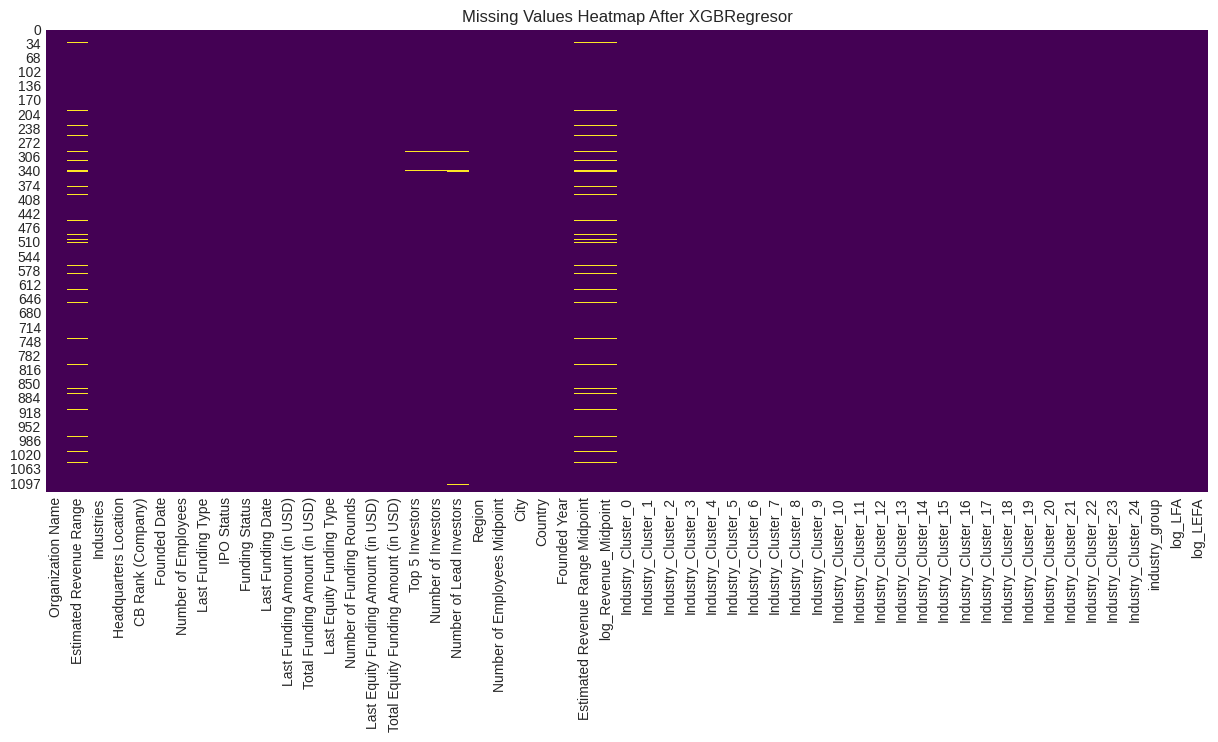

In [50]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After XGBRegresor')
plt.show()

In [51]:
# Check if missing values are filled
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Organization Name                        0
Estimated Revenue Range                 69
Industries                               0
Headquarters Location                    0
CB Rank (Company)                        0
Founded Date                             1
Number of Employees                      0
Last Funding Type                        0
IPO Status                               0
Funding Status                           0
Last Funding Date                        0
Last Funding Amount (in USD)             0
Total Funding Amount (in USD)            0
Last Equity Funding Type                 0
Number of Funding Rounds                 0
Last Equity Funding Amount (in USD)      0
Total Equity Funding Amount (in USD)     0
Top 5 Investors                          3
Number of Investors                      3
Number of Lead Investors                10
Region                                   0
Number of Employees Midpoint             0
City                

In [52]:
df['Last Funding Date'] = pd.to_datetime(df['Last Funding Date'], errors='coerce')
today = pd.to_datetime('today')
df['Days_Since_Last_Funding'] = (today - df['Last Funding Date']).dt.days
median_days = df['Days_Since_Last_Funding'].median()
df['Days_Since_Last_Funding'].fillna(median_days, inplace=True)

df['Revenue_Log_Midpoint'] = np.log1p(df['Estimated Revenue Range Midpoint'])

print("Feature created.")

Feature created.


/tmp/ipython-input-52-811257847.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Funding Date'] = pd.to_datetime(df['Last Funding Date'], errors='coerce')
/tmp/ipython-input-52-811257847.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Days_Since_Last_Funding'].fillna(median_days, inplace=True)


In [53]:
df['Number of Employees']

,Number of Employees
0,101-250
1,101-250
2,101-250
3,101-250
4,101-250
...,...
1111,51-100
1112,501-1000
1113,51-100
1114,251-500


In [54]:
df['Number of Employees Midpoint']

,Number of Employees Midpoint
0,175
1,175
2,175
3,175
4,175
...,...
1111,75
1112,750
1113,75
1114,375


In [55]:
df['log_Total_Funding'] = np.log1p(df['Total Funding Amount (in USD)'])
df['log_Total_Equity_Funding'] = np.log1p(df['Total Equity Funding Amount (in USD)'])
df['log_Employees'] = np.log1p(df['Number of Employees Midpoint'])
df['log_Days_Since_Last_Funding'] = np.log1p(df['Days_Since_Last_Funding'])

cluster_cols = [col for col in df.columns if 'Industry_Cluster_' in col]
log_feature_cols = [
    'log_Total_Funding',
    'log_Total_Equity_Funding',
    'log_Employees',
    'log_Days_Since_Last_Funding'
]
final_feature_columns = log_feature_cols + cluster_cols

X = df[final_feature_columns].copy()
print("Final feature matrix 'X' is ready. Shape:", X.shape)

Final feature matrix 'X' is ready. Shape: (1107, 29)


In [56]:
# Define the target and masks
y_reg = df['Revenue_Log_Midpoint']
train_mask = y_reg.notnull()
predict_mask = y_reg.isnull()

X_train = X[train_mask]
y_train_reg = y_reg[train_mask]
X_to_predict = X[predict_mask]

In [57]:
from sklearn.ensemble import RandomForestRegressor

revenue_regressor  = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)
revenue_regressor .fit(X_train, y_train_reg)
print("Random Forest (Average) Regressor trained.")

Random Forest (Average) Regressor trained.


In [58]:
if predict_mask.sum() > 0:
    predicted_log_midpoints = revenue_regressor.predict(X_to_predict)
    df.loc[predict_mask, 'Revenue_Log_Midpoint'] = predicted_log_midpoints
    df.loc[predict_mask, 'Estimated Revenue Range Midpoint'] = np.expm1(predicted_log_midpoints)

    category_map = df.dropna(subset=['Estimated Revenue Range', 'Estimated Revenue Range Midpoint']) \
                           .groupby('Estimated Revenue Range')['Estimated Revenue Range Midpoint'].mean().sort_values().to_dict()
    value_to_category_map = {v: k for k, v in category_map.items()}
    sorted_midpoints = sorted(value_to_category_map.keys())

    def find_closest_category(predicted_value):
        closest_midpoint = min(sorted_midpoints, key=lambda x: abs(x - predicted_value))
        return value_to_category_map[closest_midpoint]

    imputed_categories = df.loc[predict_mask, 'Estimated Revenue Range Midpoint'].apply(find_closest_category)
    df.loc[predict_mask, 'Estimated Revenue Range'] = imputed_categories
    print("Missing 'Estimated Revenue Range' values have been filled.")
else:
    print("No missing revenue values to impute.")

Missing 'Estimated Revenue Range' values have been filled.


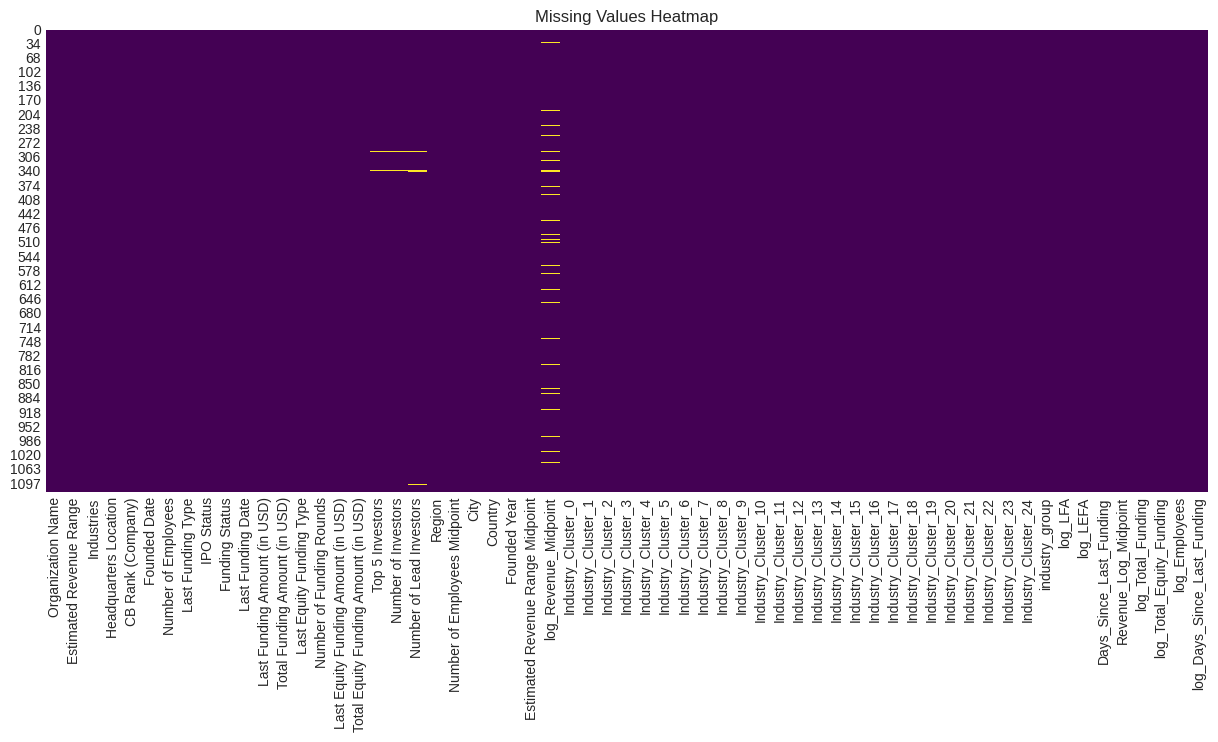

In [59]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()